In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [6]:
df=pd.read_csv("C:/Users/ankit/Desktop/Great learning/udemy/Machine learning/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv")

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [13]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

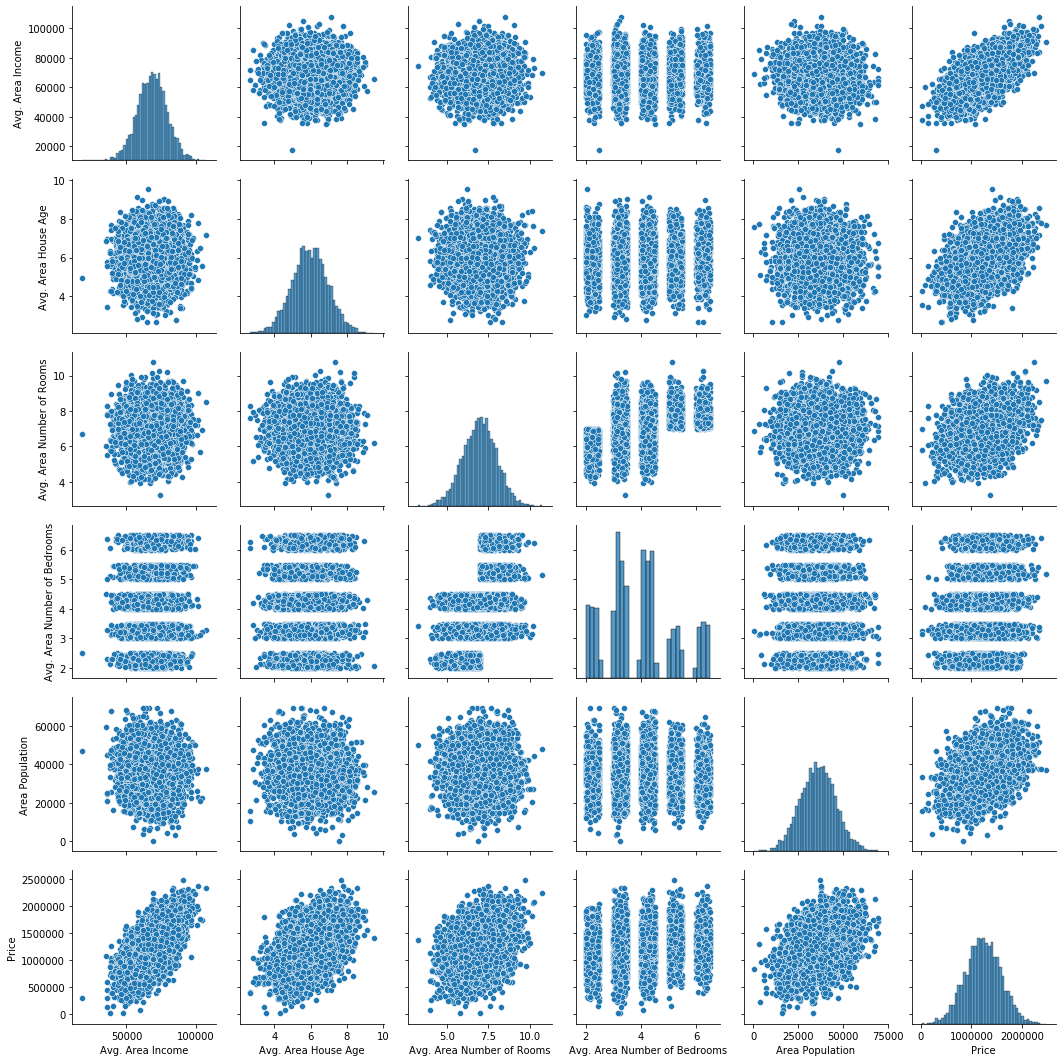

In [17]:
sns.pairplot(df)

C:\Users\ankit\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ankit\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ankit\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


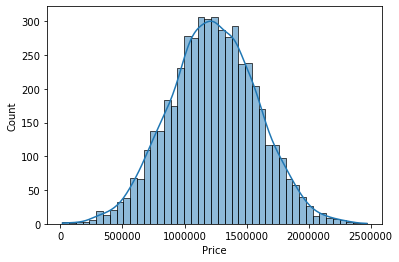

In [26]:
sns.histplot(df["Price"],kde=True)
plt.show()

In [28]:
cor=df.corr()

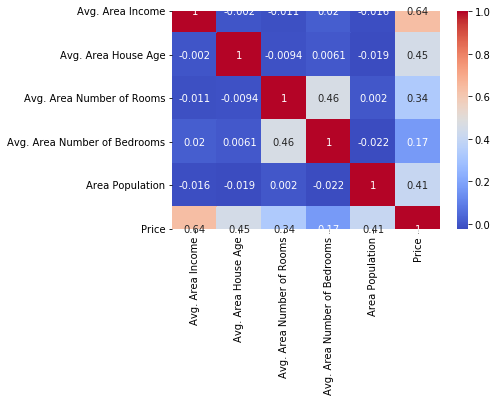

In [29]:
sns.heatmap(cor,annot=True,cmap="coolwarm")

In [30]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [32]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [33]:
y=df['Price']

In [34]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [37]:
y=y.astype(int)

In [39]:
y.head(50)

0     1059033
1     1505890
2     1058987
3     1260616
4      630943
5     1068138
6     1502055
7     1573936
8      798869
9     1545154
10    1707045
11     663732
12    1042814
13    1291331
14    1402818
15    1306674
16    1556786
17     528485
18    1019425
19    1030591
20    2146925
21     929247
22     718887
23     743999
24     895737
25    1453974
26    1125692
27     975429
28    1240763
29    1577017
30    1246830
31    1170720
32    1071279
33     534305
34     936368
35    1199193
36    1233220
37    1081150
38     524712
39     302355
40    1026817
41    1762214
42     882057
43    1744932
44    1153871
45    1499988
46    1109588
47     980177
48    1323952
49    1662494
Name: Price, dtype: int32

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [45]:
model=LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
model.intercept_

-2642239.6817204095

In [56]:
model.coef_.astype(int)

array([    21, 166552, 119512,   2758,     15])

In [57]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [59]:
cdf=pd.DataFrame(model.coef_,index=X_train.columns,columns=['coef'])
cdf

,coef
Avg. Area Income,21.570413
Avg. Area House Age,166552.479240
Avg. Area Number of Rooms,119512.533501
Avg. Area Number of Bedrooms,2758.945823
Area Population,15.296860


In [65]:
predictions=model.predict(X_test)
predictions

array([1311074.09024265, 1239575.25761021, 1243915.76631473, ...,
        840825.38516303, 1050490.52141021,  946719.97798003])

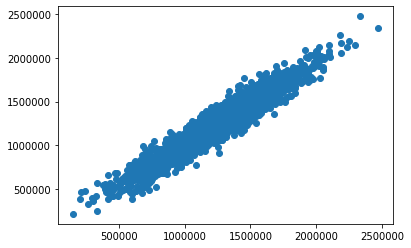

In [68]:
plt.scatter(y_test,predictions,)

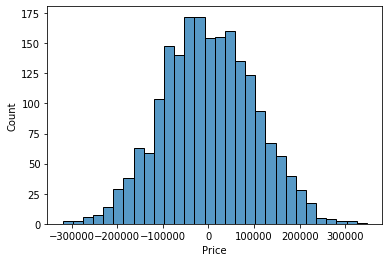

In [69]:
sns.histplot(y_test-predictions)

In [82]:
model.score(X_test,y_test)

0.9164501950271313

In [75]:
model.score(X_train,y_train)


0.9189398501053571

In [76]:
from sklearn import metrics

In [78]:
MAE=metrics.mean_absolute_error(predictions,y_test)
MAE

81331.2275372217

In [79]:
MSE=metrics.mean_squared_error(predictions,y_test)
MSE

10119735600.025995

In [81]:
RSME=np.sqrt(MSE)
RSME

100596.89657253843